In [2]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
from dfply import *
from plotnine import *
import seaborn as sns
import missingno
import random

# Stopwords from sklearn
# Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

#### Stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw

## Sentiemtn Analysis
import textblob
import vaderSentiment

# Count vectorizer for word frequencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Lemonizer
from nltk.stem.wordnet import WordNetLemmatizer
# Stemer
from nltk.stem import SnowballStemmer

# Topic modeling
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora
import pickle # saves the object into a file
# But don't worry Python can understand it
# import spacy
# spacy.load('en_core_web_sm')
# from spacy.lang.en import English
# parser = English()
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
from transformers import pipeline

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [3]:
import sys
# !{sys.executable}-m pip install --upgrade ipykernel

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [4]:
# Stopword calculations
en_stop = set(nltk.corpus.stopwords.words('english'))
specialChars = "!@#$%^&*()\'\"?.,~<>_-+{}[]|;"
myPunc = set(specialChars)
en_stop.update(myPunc)
en_stop.add('n\'t')

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [5]:
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(speeches.shape)
print(speeches.columns)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(7507, 7)
Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')


7507 rows, 7 different columns.

In [6]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

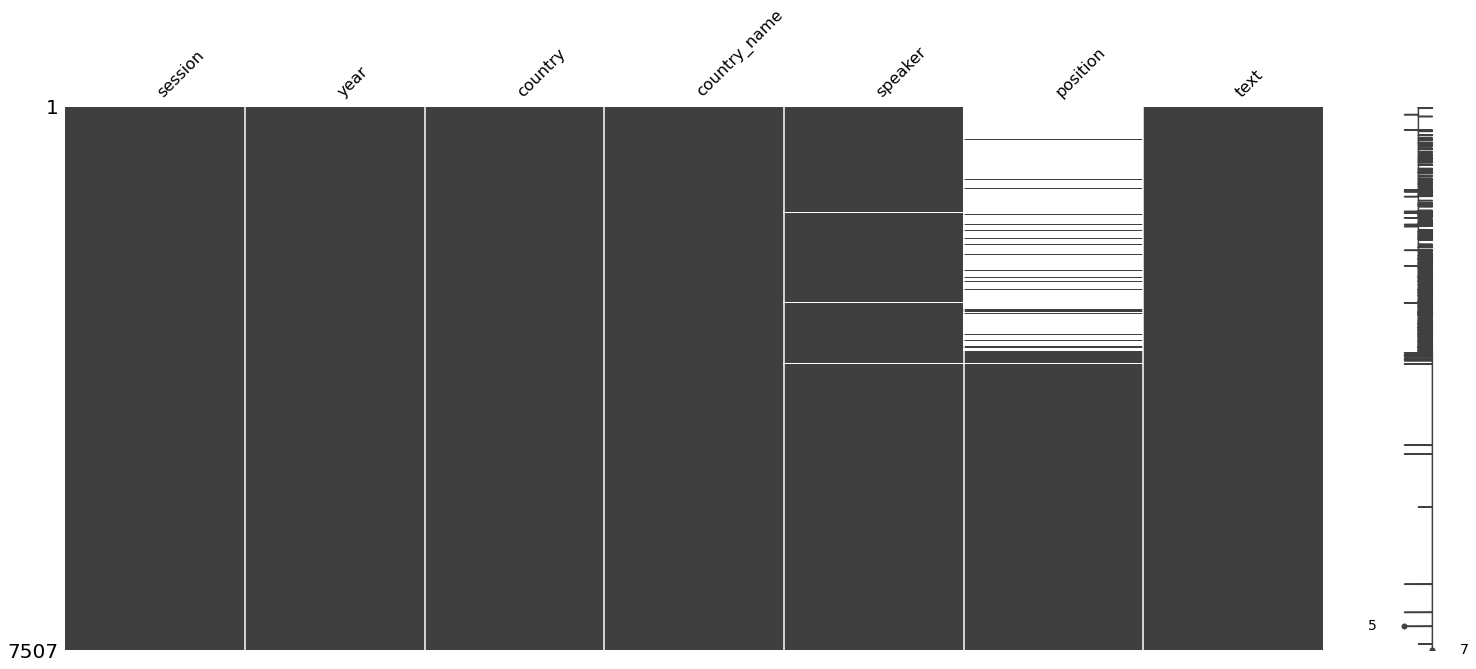

In [7]:
missingno.matrix(speeches)

Position appears to be the column with the biggest amount of missingness.

In [8]:
speeches.isna().sum()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

Wow. There are quite a bit of NAs in the `position` column. I wonder why. 

And a little bit in the `speaker` column.

My God these humans talked a FREAKTON! 

I'd rather eat horse scat off a rotting cow than read this mess.

In [9]:
# Creating an nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(speeches.text[0])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Printing text, lemma, parts of speech...

In [10]:
# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [11]:
textblob.TextBlob(doc.text).sentiment.polarity

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.116178337718085

As a whole, the first speech is filled with 0.12 sentiment. Barely positive feelings.

In [12]:
print(f"Number of stop words in nltk list: {len(nltk_sw)}")
print(f"Number of stop words in list: {len(spacy_sw)}")
#### Comparing stopword lists
print(f"Words in spacy but not in nltk: {spacy_sw.difference(set(nltk_sw))}")

Number of stop words in nltk list: 179
Number of stop words in list: 326
Words in spacy but not in nltk: {'others', 'upon', 'meanwhile', 'five', 'per', 'around', 'least', 'thereby', 'whereas', 'whereby', 'empty', 'former', 'n‘t', 'hence', 'another', 'done', 'fifteen', 'even', 'unless', 'within', 'indeed', 'eight', 'beyond', 'nine', 'latter', 'almost', "'re", 'nothing', 'therefore', 'always', 'becoming', 'anyone', 'somehow', "'ll", 'serious', 'side', '‘ll', 'move', 'less', 'third', 'something', 'throughout', 'eleven', '’d', 'fifty', "'ve", 'via', 'make', 'still', 'becomes', 'used', 'name', 'many', 'although', 'never', 'wherein', 'one', 'regarding', 'beside', 'whereafter', 'using', 'hereafter', 'due', 'moreover', 'much', 'put', 'behind', "'m", 'latterly', 'must', 'top', 'ten', 'except', 'hereupon', 'full', 'three', 'anything', 'twenty', "'d", 'thru', 'elsewhere', 'next', 'call', 'formerly', 'beforehand', 'take', 'otherwise', 'seems', 'whence', '‘re', 'namely', 'without', 'ever', 'amount'

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [13]:
#### Comparing stopword lists
print(f"Words in spacy but not in sklearn: {spacy_sw.difference(esw)}")

Words in spacy but not in sklearn: {'used', "'s", 'regarding', 'just', 'quite', 'using', '’re', 'n‘t', 'unless', 'various', "'m", 'really', '‘m', 'doing', "'re", '’s', "'ll", '’ve', '‘ll', 'n’t', '‘s', 'does', 'ca', '’ll', "'d", '’m', '’d', "'ve", 'say', '‘re', 'did', 'make', "n't", '‘ve', '‘d'}


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(en_stop, spacy_sw)
# both_sw = en_stop.update(spacy_sw)
print(f"Length of both nltk and spacy stopwords: {len(both_sw)}")



Length of both nltk and spacy stopwords: 409


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


We have successfully combined nltk, spacy, and Daniel's stop words!

In [15]:
### Vectorize training text, set min_df to 5
speeches_text = CountVectorizer(min_df=5).fit_transform(speeches["text"])
# We want words who appear in at least 5 docs

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [16]:
print(f"Number Of Features, taking words that occur in at least 5 dfs: {speeches_text.shape[1]}")

Number Of Features, taking words that occur in at least 5 dfs: 24979


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [17]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...

## Vectorization

- Lowercase
- Tokenize
- Build vocab: collect all vocab
- Lemmatize
- Remove stopwords? and punctuation
- Encode: count frequency of each word in each speech

Daniels crazy idea

- Grab multiple SA packages

- SA of each speech

- Graph the mean of each SA package or whatever and compare them?

In [71]:
def get_lemma(word, myLemonizer = WordNetLemmatizer()):
    '''
    Lemmatizes the word
    
    @param String word the given word to lemmatize
    @param myLemonizer the given lemmatizer; optional
    @return the newly lemmatized core word
    '''
    
#     print("word lemonizer", WordNetLemmatizer().lemmatize(word))
    # Should I do stemming too? Hmmmm
    return myLemonizer.lemmatize(word)

def get_stemmer(word, myStemmer = SnowballStemmer(language = "english")):
    '''
    Stems the word
    
    @param String word the given word to stem
    @param myStemmer the given stemmer; optional
    @return the newly stemmed core word
    '''
    return myStemmer.stem(word)
    

def removePunctuation(word):
    '''
    Removes punctuation from a given word
    
    @param String word the given word
    @return the word, without punctuation
    '''
    
    lastIndex = len(word) - 1
    if word[lastIndex] in myPunc:
        # eradicate the last index value
        return word[:-1]

    return word
    

def prepare_text_for_lda(text, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Tokenizes, splits, removes stopwords from the text.
    Basically, preparing text for LDA (one type of topic model)
    
    @param String text the given text
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the tokens
    '''
    text = text.lower()
    
    # Split by spaces
    tokens = text.split(" ")
    
    # Stripping away newline characters and tabs
    tokens = [word.strip("\n") for word in tokens]
    tokens = [word.strip("\t") for word in tokens]
#     tokens = [word.strip("\d") for word in tokens]
    # Strip damn numbers
    
    tokens = [token for token in tokens if len(token) > 1]
    # a
    
    tokens = [token for token in tokens if token not in both_sw]
#     if "the" or "an" or "and" in tokens:
# #         print(f"found the/an/and in: {tokens}")
#         print("found the/an/and")
    tokens = [get_lemma(token, myLemonizer) for token in tokens]
    tokens = [get_stemmer(token, myStemmer) for token in tokens]
    tokens = [removePunctuation(token) for token in tokens]
    return tokens

def getCleanedTokensList(data, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Gets cleaned tokens. 
    Processes include: lowercasing, splitting by spaces, strips spaces/tabs/newlines,
    punctuation, lemmatizing, stems
    
    @param DataFrame data the given data frame
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @param SnowballStemmer myStemmer the given stemmer
    @return the list of tokens for each speech
    '''
    text_data = []

    for line in data:
        tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
        text_data.append(tokens)
    return text_data


def generate_viz(data, NUM_TOPICS=5, myLemonizer = WordNetLemmatizer(), myStemmer = SnowballStemmer(language = "english")):
    '''
    Graphs the data by topic.
    Also saves the files and model into other files
    
    @param list data the given list of Strings
    @param int NUM_TOPICS number of topics to graph; default set to 5
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the graph, dictionary, and corpus
    '''
#     text_data = []

#     for line in data:
#         tokens = prepare_text_for_lda(line, myLemonizer, myStemmer)
#         text_data.append(tokens)
    text_data = getCleanedTokensList(data, myLemonizer, myStemmer)

    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state = 420)
    ldamodel.save('model5.gensim')

    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(f"topic: {topic}")

    dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
    corpus = pickle.load(open('corpus.pkl', 'rb'))
    lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

    lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
    return lda_display, dictionary, corpus


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Updating Both_Sw stopwords

In [76]:
# Updating Both_Sw
both_sw.update(["\n", "\t", "'s"])

# I also wanna eradicate words that appear in many documents,too
both_sw.update(["united", "states", "nation", "nations", "national", "development", "develop", "international", "state", "like", "would", "should", "country"])

print(f"Both stopwords length: {len(both_sw)}")

Both stopwords length: 422


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [21]:
# myLemonizer = WordNetLemmatizer()
# list_of_strings = speeches["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings[0:5], 3)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# myLemonizer = WordNetLemmatizer()
# # list_of_strings = speeches["text"].tolist()
# list_of_strings = (
#     speeches >>
#     mask((X.country_name == "China") | (X.country_name == "Canada"))
# )["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 2)
# pyLDAvis.display(viz)

## Topic Modelling For Each Country

In [109]:
'''
for every country:
    list of strings
    spawn a viz, dictionary, corpus
    display
'''

countriesList = speeches["country_name"].unique()

numTopics = 3
for country in countriesList:
    
    # Grab the speeches from each country
    list_of_strings = (
        speeches >>
        mask(X.country_name == country)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Country/{country}.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


topic: (0, '0.007*"albania" + 0.006*"kosovo" + 0.005*"govern" + 0.005*"region"')
topic: (1, '0.020*"peopl" + 0.006*"world" + 0.006*"countri" + 0.006*"albania"')
topic: (2, '0.017*"peopl" + 0.008*"albania" + 0.007*"countri" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"argentina" + 0.005*"world" + 0.005*"govern" + 0.005*"countri"')
topic: (1, '0.003*"new" + 0.002*"co-oper" + 0.002*"peac" + 0.002*"integr"')
topic: (2, '0.007*"argentina" + 0.007*"world" + 0.006*"countri" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"australia" + 0.008*"world" + 0.006*"govern" + 0.005*"new"')
topic: (1, '0.006*"australia" + 0.005*"secur" + 0.004*"world" + 0.004*"need"')
topic: (2, '0.004*"secur" + 0.004*"financi" + 0.004*"global" + 0.004*"need"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"austria" + 0.008*"human" + 0.006*"peac" + 0.006*"right"')
topic: (1, '0.004*"human" + 0.004*"austria" + 0.004*"effort" + 0.003*"organ"')
topic: (2, '0.007*"human" + 0.006*"right" + 0.005*"world" + 0.005*"union"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"human" + 0.007*"belgium" + 0.007*"world" + 0.006*"right"')
topic: (1, '0.003*"world" + 0.002*"right" + 0.002*"belgium" + 0.002*"question"')
topic: (2, '0.005*"european" + 0.004*"communiti" + 0.004*"new" + 0.004*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peopl" + 0.009*"peac" + 0.008*"soviet" + 0.007*"nuclear"')
topic: (1, '0.012*"belarus" + 0.006*"new" + 0.006*"world" + 0.004*"econom"')
topic: (2, '0.009*"world" + 0.007*"global" + 0.007*"belarus" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"bolivia" + 0.008*"world" + 0.006*"countri" + 0.006*"peopl"')
topic: (1, '0.009*"bolivia" + 0.005*"world" + 0.005*"govern" + 0.005*"econom"')
topic: (2, '0.009*"bolivia" + 0.007*"peopl" + 0.005*"world" + 0.005*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.005*"brazil" + 0.003*"econom" + 0.003*"human"')
topic: (1, '0.008*"world" + 0.008*"brazil" + 0.005*"peac" + 0.005*"countri"')
topic: (2, '0.008*"world" + 0.007*"econom" + 0.006*"brazil" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"canada" + 0.007*"world" + 0.005*"work" + 0.004*"year"')
topic: (1, '0.012*"canada" + 0.007*"world" + 0.006*"secur" + 0.006*"human"')
topic: (2, '0.009*"world" + 0.006*"canada" + 0.006*"human" + 0.005*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"cameroon" + 0.005*"africa" + 0.005*"right" + 0.004*"human"')
topic: (1, '0.006*"cameroon" + 0.006*"organ" + 0.005*"africa" + 0.005*"world"')
topic: (2, '0.009*"world" + 0.007*"peac" + 0.006*"econom" + 0.006*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"econom" + 0.002*"african" + 0.002*"hope" + 0.002*"africa"')
topic: (1, '0.011*"peopl" + 0.008*"africa" + 0.008*"world" + 0.006*"south"')
topic: (2, '0.009*"peopl" + 0.008*"world" + 0.008*"peac" + 0.007*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"colombia" + 0.003*"cent" + 0.003*"social" + 0.002*"increas"')
topic: (1, '0.009*"colombia" + 0.008*"world" + 0.007*"drug" + 0.004*"year"')
topic: (2, '0.010*"world" + 0.008*"countri" + 0.006*"new" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peac" + 0.007*"world" + 0.005*"rica" + 0.005*"human"')
topic: (1, '0.007*"human" + 0.003*"peac" + 0.003*"right" + 0.003*"rica"')
topic: (2, '0.009*"rica" + 0.009*"costa" + 0.009*"human" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"peopl" + 0.007*"cuba" + 0.006*"govern" + 0.005*"world"')
topic: (1, '0.009*"peopl" + 0.009*"countri" + 0.008*"world" + 0.005*"cuba"')
topic: (2, '0.006*"right" + 0.005*"world" + 0.004*"human" + 0.003*"cuba"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"dominican" + 0.002*"reform" + 0.002*"republ" + 0.002*"strengthen"')
topic: (1, '0.010*"dominican" + 0.008*"world" + 0.007*"countri" + 0.007*"republ"')
topic: (2, '0.009*"world" + 0.004*"dominican" + 0.004*"peopl" + 0.003*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"terror" + 0.002*"algeria" + 0.002*"process" + 0.001*"implement"')
topic: (1, '0.006*"algeria" + 0.003*"peac" + 0.003*"effort" + 0.003*"new"')
topic: (2, '0.009*"peopl" + 0.009*"world" + 0.007*"peac" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"ecuador" + 0.005*"world" + 0.005*"human" + 0.003*"peac"')
topic: (1, '0.002*"cent" + 0.001*"debt" + 0.001*"open" + 0.001*"peopl"')
topic: (2, '0.010*"ecuador" + 0.008*"world" + 0.008*"countri" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.006*"franc" + 0.006*"countri" + 0.005*"communiti"')
topic: (1, '0.009*"world" + 0.008*"franc" + 0.004*"right" + 0.004*"countri"')
topic: (2, '0.006*"world" + 0.005*"franc" + 0.005*"european" + 0.005*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.006*"global" + 0.004*"need" + 0.003*"peopl"')
topic: (1, '0.008*"world" + 0.006*"secur" + 0.006*"year" + 0.005*"communiti"')
topic: (2, '0.008*"world" + 0.005*"new" + 0.005*"year" + 0.005*"need"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.006*"africa" + 0.004*"ghana" + 0.003*"african"')
topic: (1, '0.005*"countri" + 0.005*"world" + 0.004*"peac" + 0.003*"ghana"')
topic: (2, '0.010*"world" + 0.009*"africa" + 0.007*"ghana" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peac" + 0.007*"guinea" + 0.006*"world" + 0.005*"govern"')
topic: (1, '0.002*"of\nth" + 0.002*"secur" + 0.002*"peac" + 0.002*"support"')
topic: (2, '0.014*"peopl" + 0.008*"guinea" + 0.007*"republ" + 0.006*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.004*"peac" + 0.003*"peopl" + 0.003*"conflict"')
topic: (1, '0.007*"peac" + 0.007*"world" + 0.006*"continu" + 0.006*"africa"')
topic: (2, '0.007*"world" + 0.006*"africa" + 0.006*"develop" + 0.005*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"guatemala" + 0.006*"peac" + 0.005*"support" + 0.005*"govern"')
topic: (1, '0.005*"guatemala" + 0.004*"peopl" + 0.003*"govern" + 0.003*"polit"')
topic: (2, '0.013*"guatemala" + 0.008*"govern" + 0.007*"central" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.004*"central" + 0.004*"govern" + 0.003*"peopl"')
topic: (1, '0.006*"peopl" + 0.005*"world" + 0.004*"human" + 0.004*"central"')
topic: (2, '0.009*"govern" + 0.008*"peac" + 0.008*"world" + 0.007*"central"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"haiti" + 0.007*"peopl" + 0.006*"haitian" + 0.006*"world"')
topic: (1, '0.007*"haiti" + 0.007*"world" + 0.007*"peopl" + 0.005*"econom"')
topic: (2, '0.008*"haiti" + 0.007*"world" + 0.007*"countri" + 0.006*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.004*"human" + 0.003*"indonesia" + 0.003*"global"')
topic: (1, '0.006*"peac" + 0.006*"world" + 0.005*"year" + 0.004*"econom"')
topic: (2, '0.009*"world" + 0.008*"develop" + 0.007*"econom" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.008*"develop" + 0.008*"countri" + 0.007*"india"')
topic: (1, '0.004*"world" + 0.004*"india" + 0.003*"council" + 0.003*"secur"')
topic: (2, '0.007*"india" + 0.006*"global" + 0.005*"world" + 0.003*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"iran" + 0.005*"human" + 0.005*"world" + 0.005*"region"')
topic: (1, '0.011*"world" + 0.007*"iran" + 0.007*"peopl" + 0.007*"countri"')
topic: (2, '0.008*"world" + 0.008*"peopl" + 0.006*"islam" + 0.006*"iran"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"iraq" + 0.005*"secur" + 0.005*"nuclear" + 0.005*"israel"')
topic: (1, '0.004*"iraq" + 0.002*"american" + 0.002*"peopl" + 0.001*"of\nth"')
topic: (2, '0.017*"iraq" + 0.008*"peopl" + 0.007*"secur" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"world" + 0.006*"iceland" + 0.006*"year" + 0.006*"human"')
topic: (1, '0.014*"iceland" + 0.006*"govern" + 0.005*"world" + 0.004*"work"')
topic: (2, '0.008*"iceland" + 0.007*"world" + 0.005*"right" + 0.005*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"israel" + 0.009*"arab" + 0.008*"peac" + 0.004*"new"')
topic: (1, '0.018*"israel" + 0.010*"peac" + 0.007*"arab" + 0.006*"world"')
topic: (2, '0.008*"israel" + 0.008*"peac" + 0.005*"terror" + 0.005*"palestinian"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"itali" + 0.004*"secur" + 0.004*"new" + 0.003*"countri"')
topic: (1, '0.006*"itali" + 0.006*"communiti" + 0.005*"world" + 0.004*"countri"')
topic: (2, '0.007*"itali" + 0.006*"world" + 0.006*"peac" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"japan" + 0.011*"peac" + 0.008*"world" + 0.008*"effort"')
topic: (1, '0.022*"japan" + 0.009*"world" + 0.009*"effort" + 0.008*"peac"')
topic: (2, '0.007*"japan" + 0.005*"effort" + 0.005*"reform" + 0.004*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"africa" + 0.008*"south" + 0.007*"kenya" + 0.007*"peac"')
topic: (1, '0.005*"kenya" + 0.003*"organ" + 0.003*"conflict" + 0.003*"support"')
topic: (2, '0.007*"africa" + 0.007*"kenya" + 0.007*"world" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"cambodia" + 0.010*"world" + 0.007*"global" + 0.006*"secur"')
topic: (1, '0.008*"cambodia" + 0.004*"world" + 0.003*"peopl" + 0.003*"wish"')
topic: (2, '0.015*"peopl" + 0.014*"kampuchea" + 0.008*"vietnames" + 0.006*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"kuwait" + 0.007*"secur" + 0.007*"iraq" + 0.007*"council"')
topic: (1, '0.003*"secur" + 0.003*"iraq" + 0.002*"kuwait" + 0.002*"view"')
topic: (2, '0.009*"kuwait" + 0.009*"world" + 0.008*"peopl" + 0.008*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peac" + 0.009*"lebanon" + 0.005*"israel" + 0.005*"world"')
topic: (1, '0.016*"lebanon" + 0.007*"peac" + 0.006*"secur" + 0.006*"israel"')
topic: (2, '0.026*"lebanon" + 0.011*"lebanes" + 0.007*"secur" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.007*"peac" + 0.006*"africa" + 0.006*"peopl"')
topic: (1, '0.008*"liberia" + 0.003*"peac" + 0.003*"arm" + 0.003*"continu"')
topic: (2, '0.010*"liberia" + 0.008*"peac" + 0.007*"world" + 0.007*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"libya" + 0.006*"secur" + 0.005*"council" + 0.004*"libyan"')
topic: (1, '0.006*"libya" + 0.006*"secur" + 0.005*"council" + 0.003*"world"')
topic: (2, '0.011*"peopl" + 0.009*"world" + 0.008*"arab" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"lanka" + 0.008*"sri" + 0.007*"world" + 0.006*"develop"')
topic: (1, '0.008*"sri" + 0.008*"lanka" + 0.005*"child" + 0.004*"world"')
topic: (2, '0.002*"cooper" + 0.001*"sanction" + 0.001*"council" + 0.001*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"morocco" + 0.006*"region" + 0.006*"peac" + 0.005*"kingdom"')
topic: (1, '0.009*"morocco" + 0.007*"world" + 0.006*"countri" + 0.005*"new"')
topic: (2, '0.008*"morocco" + 0.007*"peac" + 0.006*"peopl" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.005*"countri" + 0.005*"econom" + 0.004*"secur"')
topic: (1, '0.008*"world" + 0.007*"madagascar" + 0.006*"africa" + 0.005*"new"')
topic: (2, '0.006*"world" + 0.005*"peopl" + 0.005*"peac" + 0.004*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"mexico" + 0.003*"human" + 0.003*"secur" + 0.003*"world"')
topic: (1, '0.006*"polit" + 0.006*"world" + 0.005*"mexico" + 0.005*"countri"')
topic: (2, '0.009*"world" + 0.009*"mexico" + 0.007*"countri" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"secur" + 0.002*"council" + 0.002*"member" + 0.002*"myanmar"')
topic: (1, '0.014*"myanmar" + 0.005*"peac" + 0.005*"govern" + 0.005*"world"')
topic: (2, '0.012*"world" + 0.007*"develop" + 0.007*"econom" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"human" + 0.004*"peac" + 0.003*"secur" + 0.003*"world"')
topic: (1, '0.007*"human" + 0.007*"right" + 0.006*"world" + 0.005*"netherland"')
topic: (2, '0.010*"world" + 0.009*"human" + 0.007*"right" + 0.006*"netherland"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.007*"human" + 0.006*"econom" + 0.006*"countri"')
topic: (1, '0.007*"human" + 0.006*"right" + 0.005*"norway" + 0.004*"need"')
topic: (2, '0.005*"world" + 0.005*"peac" + 0.004*"norway" + 0.004*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"new" + 0.007*"zealand" + 0.006*"year" + 0.005*"world"')
topic: (1, '0.016*"new" + 0.013*"zealand" + 0.007*"world" + 0.006*"secur"')
topic: (2, '0.015*"new" + 0.011*"zealand" + 0.007*"world" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"pakistan" + 0.009*"peac" + 0.008*"nuclear" + 0.007*"world"')
topic: (1, '0.012*"pakistan" + 0.009*"world" + 0.007*"peac" + 0.006*"peopl"')
topic: (2, '0.008*"pakistan" + 0.007*"india" + 0.005*"peac" + 0.005*"kashmir"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peru" + 0.006*"world" + 0.005*"countri" + 0.005*"econom"')
topic: (1, '0.003*"latin" + 0.003*"region" + 0.003*"world" + 0.002*"today"')
topic: (2, '0.010*"world" + 0.008*"peru" + 0.007*"countri" + 0.007*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.009*"philippin" + 0.006*"peac" + 0.005*"global"')
topic: (1, '0.006*"world" + 0.006*"philippin" + 0.004*"debt" + 0.004*"peac"')
topic: (2, '0.010*"world" + 0.005*"year" + 0.005*"new" + 0.005*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"paraguay" + 0.006*"world" + 0.005*"republ" + 0.004*"support"')
topic: (1, '0.011*"paraguay" + 0.009*"world" + 0.008*"countri" + 0.006*"peac"')
topic: (2, '0.008*"world" + 0.008*"paraguay" + 0.007*"countri" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"rwanda" + 0.005*"govern" + 0.005*"presid" + 0.005*"genocid"')
topic: (1, '0.009*"rwanda" + 0.004*"govern" + 0.004*"peac" + 0.003*"africa"')
topic: (2, '0.009*"world" + 0.009*"countri" + 0.008*"rwanda" + 0.007*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peac" + 0.008*"peopl" + 0.007*"econom" + 0.007*"sudan"')
topic: (1, '0.009*"world" + 0.003*"need" + 0.003*"africa" + 0.003*"israel"')
topic: (2, '0.013*"sudan" + 0.008*"peac" + 0.005*"govern" + 0.005*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"world" + 0.008*"countri" + 0.005*"small" + 0.005*"power"')
topic: (1, '0.005*"world" + 0.005*"nam" + 0.005*"viet" + 0.004*"nations"')
topic: (2, '0.011*"world" + 0.007*"econom" + 0.007*"countri" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"sierra" + 0.004*"peac" + 0.004*"world" + 0.003*"leon"')
topic: (1, '0.007*"sierra" + 0.004*"leon" + 0.003*"peac" + 0.003*"peopl"')
topic: (2, '0.008*"world" + 0.007*"sierra" + 0.007*"govern" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peac" + 0.009*"salvador" + 0.007*"el" + 0.007*"govern"')
topic: (1, '0.009*"salvador" + 0.009*"el" + 0.006*"world" + 0.005*"peac"')
topic: (2, '0.006*"govern" + 0.006*"countri" + 0.005*"world" + 0.005*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peopl" + 0.009*"world" + 0.008*"africa" + 0.007*"peac"')
topic: (1, '0.015*"somalia" + 0.008*"govern" + 0.007*"world" + 0.007*"peac"')
topic: (2, '0.010*"peopl" + 0.008*"world" + 0.008*"peac" + 0.007*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"israel" + 0.010*"peopl" + 0.009*"world" + 0.008*"peac"')
topic: (1, '0.009*"world" + 0.009*"israel" + 0.009*"peopl" + 0.009*"arab"')
topic: (2, '0.009*"peac" + 0.006*"region" + 0.006*"world" + 0.005*"arab"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"togo" + 0.001*"violenc" + 0.001*"africa" + 0.001*"act"')
topic: (1, '0.010*"peac" + 0.009*"peopl" + 0.009*"world" + 0.008*"countri"')
topic: (2, '0.008*"peac" + 0.008*"togo" + 0.006*"world" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"thailand" + 0.008*"human" + 0.005*"peac" + 0.005*"world"')
topic: (1, '0.009*"thailand" + 0.008*"deleg" + 0.007*"world" + 0.006*"peac"')
topic: (2, '0.009*"thailand" + 0.009*"world" + 0.006*"countri" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"tobago" + 0.006*"trinidad" + 0.005*"world" + 0.004*"govern"')
topic: (1, '0.009*"tobago" + 0.008*"trinidad" + 0.004*"global" + 0.004*"world"')
topic: (2, '0.011*"develop" + 0.010*"tobago" + 0.009*"trinidad" + 0.009*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"great" + 0.004*"peopl" + 0.004*"world" + 0.004*"new"')
topic: (1, '0.012*"tunisia" + 0.006*"effort" + 0.006*"secur" + 0.006*"world"')
topic: (2, '0.009*"world" + 0.007*"peac" + 0.007*"countri" + 0.007*"tunisia"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"peac" + 0.004*"secur" + 0.003*"turkey" + 0.003*"time"')
topic: (1, '0.008*"turkey" + 0.007*"peac" + 0.006*"world" + 0.006*"secur"')
topic: (2, '0.005*"turkey" + 0.005*"problem" + 0.005*"continu" + 0.005*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nuclear" + 0.008*"peac" + 0.008*"world" + 0.008*"peopl"')
topic: (1, '0.009*"ukrain" + 0.006*"secur" + 0.004*"peac" + 0.003*"council"')
topic: (2, '0.014*"ukrain" + 0.007*"secur" + 0.006*"world" + 0.005*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.007*"uruguay" + 0.007*"peac" + 0.006*"countri"')
topic: (1, '0.008*"world" + 0.005*"uruguay" + 0.004*"human" + 0.004*"peopl"')
topic: (2, '0.006*"countri" + 0.006*"world" + 0.005*"polit" + 0.005*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"peac" + 0.006*"econom" + 0.004*"nuclear"')
topic: (1, '0.011*"world" + 0.008*"peopl" + 0.006*"peac" + 0.005*"new"')
topic: (2, '0.012*"world" + 0.007*"peopl" + 0.005*"peac" + 0.005*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"world" + 0.008*"peopl" + 0.006*"venezuela" + 0.005*"presid"')
topic: (1, '0.008*"world" + 0.006*"peopl" + 0.005*"venezuela" + 0.004*"social"')
topic: (2, '0.010*"world" + 0.009*"countri" + 0.006*"econom" + 0.006*"venezuela"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"countri" + 0.005*"non-align" + 0.004*"right"')
topic: (1, '0.014*"world" + 0.011*"countri" + 0.008*"peopl" + 0.007*"peac"')
topic: (2, '0.017*"serbia" + 0.010*"kosovo" + 0.006*"world" + 0.006*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"africa" + 0.008*"south" + 0.007*"world" + 0.005*"african"')
topic: (1, '0.012*"world" + 0.008*"human" + 0.007*"peopl" + 0.006*"africa"')
topic: (2, '0.013*"south" + 0.012*"africa" + 0.007*"african" + 0.006*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"peac" + 0.005*"africa" + 0.004*"zambia" + 0.004*"world"')
topic: (1, '0.007*"zambia" + 0.004*"africa" + 0.004*"govern" + 0.004*"world"')
topic: (2, '0.012*"africa" + 0.009*"south" + 0.007*"peopl" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"afghanistan" + 0.008*"afghan" + 0.005*"secur" + 0.005*"peac"')
topic: (1, '0.015*"afghanistan" + 0.005*"peopl" + 0.005*"region" + 0.004*"world"')
topic: (2, '0.014*"afghanistan" + 0.009*"peopl" + 0.008*"peac" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"burundi" + 0.004*"peac" + 0.002*"organ" + 0.002*"of\nth"')
topic: (1, '0.004*"africa" + 0.004*"world" + 0.003*"peopl" + 0.003*"coloni"')
topic: (2, '0.012*"burundi" + 0.009*"peopl" + 0.007*"govern" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"countri" + 0.007*"peac" + 0.006*"benin" + 0.006*"world"')
topic: (1, '0.015*"peopl" + 0.008*"world" + 0.007*"countri" + 0.007*"benin"')
topic: (2, '0.006*"benin" + 0.005*"africa" + 0.004*"new" + 0.004*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.004*"year" + 0.004*"peopl" + 0.003*"organ"')
topic: (1, '0.010*"faso" + 0.009*"burkina" + 0.007*"world" + 0.006*"peac"')
topic: (2, '0.010*"countri" + 0.008*"world" + 0.007*"develop" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"bulgaria" + 0.006*"secur" + 0.006*"region" + 0.005*"support"')
topic: (1, '0.005*"bulgaria" + 0.005*"region" + 0.004*"european" + 0.004*"secur"')
topic: (2, '0.012*"peopl" + 0.010*"peac" + 0.009*"world" + 0.008*"bulgaria"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"central" + 0.007*"african" + 0.006*"world" + 0.006*"peac"')
topic: (1, '0.002*"law" + 0.002*"rule" + 0.002*"african" + 0.002*"of\nth"')
topic: (2, '0.016*"african" + 0.014*"central" + 0.008*"republ" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"chile" + 0.005*"human" + 0.004*"secur"')
topic: (1, '0.004*"council" + 0.002*"need" + 0.002*"reform" + 0.002*"process"')
topic: (2, '0.009*"chile" + 0.007*"world" + 0.006*"govern" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peopl" + 0.005*"superpow" + 0.004*"mao" + 0.004*"world"')
topic: (1, '0.016*"countri" + 0.015*"world" + 0.014*"peopl" + 0.009*"peac"')
topic: (2, '0.015*"china" + 0.011*"world" + 0.010*"peac" + 0.010*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peac" + 0.005*"econom" + 0.005*"world" + 0.005*"africa"')
topic: (1, '0.009*"countri" + 0.007*"peac" + 0.006*"world" + 0.006*"africa"')
topic: (2, '0.008*"côte" + 0.007*"world" + 0.006*"peac" + 0.005*"d\'ivoir"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"zair" + 0.004*"world" + 0.003*"peopl" + 0.003*"countri"')
topic: (1, '0.008*"world" + 0.007*"countri" + 0.007*"peac" + 0.006*"africa"')
topic: (2, '0.009*"congo" + 0.009*"republ" + 0.008*"democrat" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peac" + 0.008*"world" + 0.006*"secur" + 0.006*"year"')
topic: (1, '0.010*"peac" + 0.007*"nuclear" + 0.006*"peopl" + 0.006*"world"')
topic: (2, '0.004*"year" + 0.003*"organis" + 0.003*"organ" + 0.003*"chang"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"cyprus" + 0.008*"problem" + 0.008*"secur" + 0.007*"world"')
topic: (1, '0.012*"cyprus" + 0.007*"problem" + 0.006*"turkish" + 0.005*"world"')
topic: (2, '0.010*"cyprus" + 0.005*"turkey" + 0.005*"problem" + 0.004*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"egypt" + 0.009*"peac" + 0.008*"peopl" + 0.007*"israel"')
topic: (1, '0.008*"world" + 0.007*"egypt" + 0.007*"peopl" + 0.007*"peac"')
topic: (2, '0.004*"secur" + 0.004*"peac" + 0.004*"need" + 0.003*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"council" + 0.002*"secur" + 0.002*"spain" + 0.002*"world"')
topic: (1, '0.011*"spain" + 0.006*"human" + 0.006*"world" + 0.005*"peac"')
topic: (2, '0.009*"spain" + 0.006*"peac" + 0.006*"govern" + 0.005*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"ethiopia" + 0.004*"peac" + 0.003*"millennium" + 0.003*"effort"')
topic: (1, '0.007*"ethiopia" + 0.004*"forc" + 0.003*"africa" + 0.003*"econom"')
topic: (2, '0.009*"africa" + 0.009*"peac" + 0.008*"ethiopia" + 0.006*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"finland" + 0.007*"need" + 0.007*"secur" + 0.006*"human"')
topic: (1, '0.008*"govern" + 0.008*"world" + 0.008*"secur" + 0.007*"peac"')
topic: (2, '0.005*"need" + 0.005*"human" + 0.004*"right" + 0.004*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"fiji" + 0.006*"countri" + 0.005*"develop"')
topic: (1, '0.022*"fiji" + 0.005*"govern" + 0.005*"peopl" + 0.004*"fijian"')
topic: (2, '0.009*"fiji" + 0.007*"world" + 0.006*"countri" + 0.006*"pacif"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"countri" + 0.006*"africa" + 0.006*"peac"')
topic: (1, '0.009*"gabon" + 0.007*"peac" + 0.007*"world" + 0.006*"africa"')
topic: (2, '0.008*"world" + 0.007*"countri" + 0.005*"africa" + 0.005*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"peac" + 0.004*"world" + 0.004*"region" + 0.004*"global"')
topic: (1, '0.006*"european" + 0.004*"greec" + 0.004*"support" + 0.004*"peac"')
topic: (2, '0.006*"peac" + 0.006*"secur" + 0.006*"problem" + 0.006*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"countri" + 0.007*"develop" + 0.007*"world" + 0.007*"global"')
topic: (1, '0.009*"venezuela" + 0.008*"guyana" + 0.005*"global" + 0.004*"year"')
topic: (2, '0.008*"develop" + 0.008*"world" + 0.007*"econom" + 0.005*"organ"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.005*"peopl" + 0.005*"year" + 0.004*"war"')
topic: (1, '0.009*"peopl" + 0.007*"govern" + 0.007*"world" + 0.006*"republ"')
topic: (2, '0.007*"world" + 0.007*"govern" + 0.006*"right" + 0.006*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"ireland" + 0.007*"world" + 0.006*"right" + 0.006*"human"')
topic: (1, '0.001*"ireland" + 0.001*"loyalti" + 0.001*"human" + 0.001*"deliv"')
topic: (2, '0.009*"ireland" + 0.006*"peac" + 0.005*"secur" + 0.005*"conflict"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"debtor" + 0.001*"narcot" + 0.001*"creditor" + 0.001*"aid"')
topic: (1, '0.005*"global" + 0.004*"world" + 0.003*"trade" + 0.003*"need"')
topic: (2, '0.010*"develop" + 0.009*"countri" + 0.009*"world" + 0.008*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"peac" + 0.010*"israel" + 0.010*"arab" + 0.008*"palestinian"')
topic: (1, '0.008*"peac" + 0.007*"jordan" + 0.007*"world" + 0.006*"region"')
topic: (2, '0.006*"jordan" + 0.005*"peac" + 0.005*"world" + 0.004*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"peopl" + 0.012*"lao" + 0.009*"republ" + 0.009*"democrat"')
topic: (1, '0.022*"peopl" + 0.013*"lao" + 0.011*"countri" + 0.009*"peac"')
topic: (2, '0.008*"world" + 0.006*"peac" + 0.006*"peopl" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"european" + 0.005*"union" + 0.005*"secur" + 0.004*"human"')
topic: (1, '0.005*"luxembourg" + 0.004*"council" + 0.004*"secur" + 0.004*"organ"')
topic: (2, '0.007*"world" + 0.005*"countri" + 0.005*"communiti" + 0.004*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"mali" + 0.007*"peac" + 0.005*"world" + 0.004*"secur"')
topic: (1, '0.010*"peopl" + 0.009*"world" + 0.007*"econom" + 0.007*"peac"')
topic: (2, '0.007*"world" + 0.006*"peopl" + 0.004*"africa" + 0.004*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"malta" + 0.008*"mediterranean" + 0.007*"region" + 0.006*"secur"')
topic: (1, '0.008*"malta" + 0.004*"region" + 0.004*"year" + 0.004*"secur"')
topic: (2, '0.010*"malta" + 0.006*"world" + 0.005*"continu" + 0.005*"mediterranean"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"democraci" + 0.002*"trade" + 0.002*"effort" + 0.002*"countri"')
topic: (1, '0.016*"peopl" + 0.011*"republ" + 0.010*"peac" + 0.010*"mongolian"')
topic: (2, '0.013*"mongolia" + 0.008*"world" + 0.006*"human" + 0.005*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"council" + 0.001*"of\nth" + 0.001*"effort" + 0.001*"outcom"')
topic: (1, '0.009*"peopl" + 0.008*"peac" + 0.007*"countri" + 0.006*"world"')
topic: (2, '0.002*"of\nth" + 0.002*"secur" + 0.002*"peac" + 0.001*"mali"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.007*"mauritius" + 0.006*"peac" + 0.006*"countri"')
topic: (1, '0.001*"deleg" + 0.001*"my\ngovern" + 0.001*"2005" + 0.001*"peopl"')
topic: (2, '0.008*"world" + 0.004*"peac" + 0.004*"develop" + 0.004*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.005*"countri" + 0.003*"peopl" + 0.003*"islam"')
topic: (1, '0.009*"world" + 0.008*"countri" + 0.007*"develop" + 0.006*"peac"')
topic: (2, '0.003*"islam" + 0.003*"world" + 0.003*"peopl" + 0.003*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"niger" + 0.005*"peac" + 0.005*"secur" + 0.005*"countri"')
topic: (1, '0.008*"niger" + 0.005*"peac" + 0.004*"countri" + 0.003*"world"')
topic: (2, '0.010*"world" + 0.007*"peopl" + 0.007*"niger" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"african" + 0.003*"union" + 0.002*"peac" + 0.002*"au"')
topic: (1, '0.011*"africa" + 0.009*"world" + 0.007*"econom" + 0.006*"nigeria"')
topic: (2, '0.008*"africa" + 0.006*"peac" + 0.006*"world" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nicaragua" + 0.006*"govern" + 0.006*"peopl" + 0.005*"world"')
topic: (1, '0.008*"new" + 0.006*"nicaragua" + 0.006*"world" + 0.004*"social"')
topic: (2, '0.011*"peopl" + 0.009*"nicaragua" + 0.007*"world" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"nepal" + 0.006*"peac" + 0.005*"world" + 0.005*"countri"')
topic: (1, '0.012*"nepal" + 0.009*"peac" + 0.007*"human" + 0.006*"world"')
topic: (2, '0.011*"develop" + 0.010*"peac" + 0.010*"countri" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"panama" + 0.007*"canal" + 0.007*"govern" + 0.006*"peopl"')
topic: (1, '0.007*"panama" + 0.006*"panamanian" + 0.006*"govern" + 0.006*"peopl"')
topic: (2, '0.017*"panama" + 0.007*"world" + 0.006*"latin" + 0.006*"canal"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"human" + 0.004*"organ" + 0.004*"poland" + 0.004*"right"')
topic: (1, '0.002*"human" + 0.002*"secur" + 0.002*"poland" + 0.002*"new"')
topic: (2, '0.009*"poland" + 0.009*"world" + 0.007*"peac" + 0.007*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peac" + 0.007*"world" + 0.005*"secur" + 0.005*"right"')
topic: (1, '0.007*"peopl" + 0.006*"world" + 0.005*"peac" + 0.004*"region"')
topic: (2, '0.011*"world" + 0.008*"peopl" + 0.008*"peac" + 0.006*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"romania" + 0.005*"region" + 0.004*"council" + 0.004*"secur"')
topic: (1, '0.008*"romania" + 0.006*"human" + 0.005*"support" + 0.005*"region"')
topic: (2, '0.010*"world" + 0.009*"peac" + 0.009*"peopl" + 0.009*"romania"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"soviet" + 0.010*"union" + 0.008*"world" + 0.008*"nuclear"')
topic: (1, '0.008*"world" + 0.007*"secur" + 0.007*"russia" + 0.004*"region"')
topic: (2, '0.005*"secur" + 0.004*"world" + 0.003*"council" + 0.003*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"saudi" + 0.005*"arabia" + 0.004*"secur" + 0.004*"kingdom"')
topic: (1, '0.009*"arab" + 0.009*"world" + 0.008*"peac" + 0.008*"peopl"')
topic: (2, '0.009*"peac" + 0.007*"world" + 0.007*"secur" + 0.006*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.006*"peac" + 0.006*"africa" + 0.005*"african"')
topic: (1, '0.007*"world" + 0.006*"peac" + 0.006*"africa" + 0.006*"peopl"')
topic: (2, '0.007*"world" + 0.006*"africa" + 0.006*"peac" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"human" + 0.007*"need" + 0.007*"world" + 0.006*"right"')
topic: (1, '0.005*"need" + 0.004*"human" + 0.004*"secur" + 0.004*"weapon"')
topic: (2, '0.008*"world" + 0.007*"peac" + 0.007*"secur" + 0.006*"import"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"chad" + 0.007*"peac" + 0.007*"govern" + 0.007*"countri"')
topic: (1, '0.007*"chad" + 0.003*"peac" + 0.003*"conflict" + 0.003*"secur"')
topic: (2, '0.013*"chad" + 0.007*"peac" + 0.007*"peopl" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"africa" + 0.009*"world" + 0.008*"south" + 0.008*"econom"')
topic: (1, '0.006*"world" + 0.004*"peac" + 0.004*"tanzania" + 0.004*"develop"')
topic: (2, '0.007*"africa" + 0.007*"peopl" + 0.006*"tanzania" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"uganda" + 0.005*"peac" + 0.005*"support" + 0.004*"countri"')
topic: (1, '0.010*"africa" + 0.009*"uganda" + 0.008*"world" + 0.007*"peopl"')
topic: (2, '0.010*"uganda" + 0.006*"africa" + 0.005*"world" + 0.004*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.023*"peopl" + 0.009*"world" + 0.008*"peac" + 0.008*"arab"')
topic: (1, '0.005*"agreement" + 0.005*"region" + 0.004*"address" + 0.003*"effort"')
topic: (2, '0.015*"peopl" + 0.010*"peac" + 0.010*"econom" + 0.009*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"yemen" + 0.008*"peac" + 0.006*"secur" + 0.005*"peopl"')
topic: (1, '0.007*"yemen" + 0.005*"secur" + 0.004*"peac" + 0.004*"republ"')
topic: (2, '0.010*"peopl" + 0.010*"peac" + 0.009*"world" + 0.008*"arab"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.008*"peac" + 0.007*"econom" + 0.007*"arab"')
topic: (1, '0.012*"arab" + 0.009*"region" + 0.009*"peac" + 0.008*"emir"')
topic: (2, '0.011*"arab" + 0.009*"peac" + 0.007*"emir" + 0.006*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"world" + 0.008*"peopl" + 0.007*"peac" + 0.006*"resolut"')
topic: (1, '0.013*"world" + 0.010*"peac" + 0.008*"secur" + 0.007*"peopl"')
topic: (2, '0.009*"bahrain" + 0.008*"peac" + 0.008*"region" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"world" + 0.002*"new" + 0.002*"barbado" + 0.002*"econom"')
topic: (1, '0.007*"barbado" + 0.004*"small" + 0.004*"world" + 0.004*"caribbean"')
topic: (2, '0.009*"barbado" + 0.008*"world" + 0.008*"countri" + 0.008*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.005*"nations" + 0.004*"the\nunit" + 0.004*"countri"')
topic: (1, '0.009*"countri" + 0.008*"develop" + 0.007*"bhutan" + 0.006*"world"')
topic: (2, '0.009*"world" + 0.007*"peac" + 0.006*"hope" + 0.005*"develop"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"countri" + 0.006*"effort" + 0.006*"govern"')
topic: (1, '0.008*"human" + 0.006*"right" + 0.006*"secur" + 0.005*"council"')
topic: (2, '0.007*"denmark" + 0.004*"peopl" + 0.004*"right" + 0.003*"support"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"malawi" + 0.006*"global" + 0.005*"food" + 0.005*"govern"')
topic: (1, '0.012*"malawi" + 0.009*"govern" + 0.007*"peac" + 0.007*"deleg"')
topic: (2, '0.010*"malawi" + 0.009*"africa" + 0.007*"govern" + 0.005*"african"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"peac" + 0.008*"effort" + 0.007*"world" + 0.007*"countri"')
topic: (1, '0.007*"peac" + 0.005*"effort" + 0.005*"oman" + 0.005*"world"')
topic: (2, '0.009*"peac" + 0.007*"world" + 0.006*"countri" + 0.006*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"portug" + 0.007*"right" + 0.006*"peopl" + 0.005*"human"')
topic: (1, '0.004*"timor" + 0.004*"east" + 0.004*"secur" + 0.003*"countri"')
topic: (2, '0.007*"portug" + 0.006*"peac" + 0.005*"human" + 0.005*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peac" + 0.010*"world" + 0.009*"swaziland" + 0.007*"econom"')
topic: (1, '0.009*"kingdom" + 0.008*"swaziland" + 0.006*"world" + 0.006*"peopl"')
topic: (2, '0.008*"world" + 0.008*"kingdom" + 0.007*"swaziland" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"bahama" + 0.003*"continu" + 0.003*"haiti" + 0.003*"caribbean"')
topic: (1, '0.009*"bahama" + 0.005*"world" + 0.005*"small" + 0.004*"develop"')
topic: (2, '0.015*"bahama" + 0.008*"world" + 0.007*"econom" + 0.006*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"german" + 0.014*"democrat" + 0.014*"republ" + 0.011*"peac"')
topic: (1, '0.000*"german" + 0.000*"republ" + 0.000*"democrat" + 0.000*"peac"')
topic: (2, '0.017*"german" + 0.017*"republ" + 0.017*"democrat" + 0.010*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"world" + 0.008*"peac" + 0.007*"countri" + 0.006*"right"')
topic: (1, '0.005*"european" + 0.003*"union" + 0.002*"global" + 0.001*"council"')
topic: (2, '0.007*"world" + 0.005*"secur" + 0.005*"peac" + 0.004*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"africa" + 0.008*"world" + 0.007*"south" + 0.006*"peac"')
topic: (1, '0.007*"world" + 0.005*"peac" + 0.005*"secur" + 0.004*"africa"')
topic: (2, '0.013*"africa" + 0.011*"south" + 0.007*"peopl" + 0.007*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"bangladesh" + 0.003*"human" + 0.003*"world" + 0.003*"food"')
topic: (1, '0.001*"united\nn" + 0.001*"way" + 0.001*"of\nth" + 0.001*"council"')
topic: (2, '0.010*"world" + 0.009*"bangladesh" + 0.007*"develop" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"africa" + 0.007*"peac" + 0.005*"continu"')
topic: (1, '0.002*"communiti" + 0.002*"secur" + 0.002*"year" + 0.002*"develop"')
topic: (2, '0.012*"africa" + 0.011*"south" + 0.008*"peopl" + 0.007*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"council" + 0.002*"promot" + 0.001*"interest" + 0.001*"need"')
topic: (1, '0.011*"guinea" + 0.011*"equatori" + 0.009*"world" + 0.008*"countri"')
topic: (2, '0.005*"guinea" + 0.004*"democrat" + 0.004*"equatori" + 0.004*"polit"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"peopl" + 0.005*"world" + 0.005*"human" + 0.004*"man"')
topic: (1, '0.010*"grenada" + 0.005*"world" + 0.005*"econom" + 0.004*"peopl"')
topic: (2, '0.010*"grenada" + 0.008*"world" + 0.008*"peopl" + 0.007*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"right" + 0.002*"develop" + 0.002*"debt" + 0.002*"countri"')
topic: (1, '0.020*"peopl" + 0.009*"south" + 0.009*"africa" + 0.007*"countri"')
topic: (2, '0.008*"peac" + 0.005*"govern" + 0.005*"region" + 0.005*"mozambiqu"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.003*"union" + 0.002*"peopl" + 0.002*"countri"')
topic: (1, '0.006*"comorian" + 0.006*"island" + 0.006*"peopl" + 0.005*"comoro"')
topic: (2, '0.008*"peac" + 0.007*"world" + 0.007*"peopl" + 0.005*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"peopl" + 0.007*"econom" + 0.007*"countri" + 0.007*"world"')
topic: (1, '0.006*"world" + 0.006*"countri" + 0.006*"peac" + 0.005*"cape"')
topic: (2, '0.005*"countri" + 0.003*"sahel" + 0.003*"peac" + 0.003*"effort"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"guinea-bissau" + 0.007*"polit" + 0.005*"peopl" + 0.004*"support"')
topic: (1, '0.011*"peopl" + 0.007*"peac" + 0.007*"countri" + 0.006*"world"')
topic: (2, '0.007*"guinea-bissau" + 0.006*"world" + 0.006*"peac" + 0.006*"econom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"year" + 0.003*"develop" + 0.003*"world" + 0.003*"action"')
topic: (1, '0.009*"world" + 0.008*"maldiv" + 0.007*"peac" + 0.007*"develop"')
topic: (2, '0.006*"maldiv" + 0.006*"world" + 0.005*"small" + 0.004*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"new" + 0.000*"papua" + 0.000*"govern" + 0.000*"guinea"')
topic: (1, '0.015*"new" + 0.012*"guinea" + 0.010*"papua" + 0.006*"govern"')
topic: (2, '0.017*"new" + 0.012*"govern" + 0.012*"guinea" + 0.010*"papua"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"peopl" + 0.006*"world" + 0.005*"tome" + 0.005*"sao"')
topic: (1, '0.015*"peopl" + 0.007*"world" + 0.007*"econom" + 0.006*"countri"')
topic: (2, '0.008*"sao" + 0.008*"tome" + 0.007*"peopl" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"govern" + 0.008*"econom" + 0.008*"world" + 0.007*"develop"')
topic: (1, '0.006*"global" + 0.006*"world" + 0.005*"govern" + 0.005*"peac"')
topic: (2, '0.005*"world" + 0.004*"peac" + 0.004*"surinam" + 0.003*"communiti"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.018*"peopl" + 0.008*"republ" + 0.008*"angola" + 0.007*"govern"')
topic: (1, '0.011*"angola" + 0.009*"peac" + 0.008*"peopl" + 0.007*"govern"')
topic: (2, '0.005*"peac" + 0.005*"angola" + 0.005*"countri" + 0.004*"govern"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"peopl" + 0.007*"world" + 0.006*"countri" + 0.006*"seychell"')
topic: (1, '0.006*"world" + 0.005*"seychell" + 0.005*"peopl" + 0.004*"countri"')
topic: (2, '0.009*"countri" + 0.009*"develop" + 0.005*"world" + 0.004*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"africa" + 0.001*"plan" + 0.001*"let" + 0.001*"secur"')
topic: (1, '0.007*"samoa" + 0.007*"climat" + 0.007*"world" + 0.006*"chang"')
topic: (2, '0.009*"world" + 0.006*"peac" + 0.005*"countri" + 0.005*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"develop" + 0.002*"war" + 0.002*"life" + 0.002*"countri"')
topic: (1, '0.017*"peopl" + 0.012*"countri" + 0.011*"nam" + 0.011*"viet"')
topic: (2, '0.013*"nam" + 0.012*"viet" + 0.009*"world" + 0.007*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.003*"need" + 0.002*"africa" + 0.002*"somalia"')
topic: (1, '0.005*"somalia" + 0.004*"world" + 0.004*"peac" + 0.003*"new"')
topic: (2, '0.008*"peac" + 0.007*"econom" + 0.007*"peopl" + 0.006*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"dominica" + 0.005*"peopl" + 0.005*"small"')
topic: (1, '0.009*"world" + 0.006*"dominica" + 0.006*"human" + 0.005*"peopl"')
topic: (2, '0.010*"dominica" + 0.007*"develop" + 0.006*"small" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"right" + 0.004*"human" + 0.004*"univers" + 0.003*"respect"')
topic: (1, '0.012*"human" + 0.007*"right" + 0.006*"respons" + 0.005*"holi"')
topic: (2, '0.011*"human" + 0.006*"holi" + 0.006*"right" + 0.005*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"lucia" + 0.009*"world" + 0.009*"saint" + 0.008*"develop"')
topic: (1, '0.008*"lucia" + 0.006*"saint" + 0.006*"world" + 0.005*"global"')
topic: (2, '0.003*"world" + 0.002*"lucia" + 0.002*"deleg" + 0.002*"caribbean"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.005*"countri" + 0.004*"vincent" + 0.004*"peopl"')
topic: (1, '0.007*"vincent" + 0.005*"saint" + 0.005*"world" + 0.004*"grenadin"')
topic: (2, '0.009*"world" + 0.006*"vincent" + 0.005*"peopl" + 0.005*"saint"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"world" + 0.000*"peopl" + 0.000*"peac" + 0.000*"econom"')
topic: (1, '0.006*"world" + 0.004*"peac" + 0.004*"africa" + 0.004*"secur"')
topic: (2, '0.007*"africa" + 0.007*"peac" + 0.006*"econom" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"countri" + 0.008*"world" + 0.006*"develop" + 0.006*"peopl"')
topic: (1, '0.006*"barbuda" + 0.005*"countri" + 0.005*"world" + 0.005*"econom"')
topic: (2, '0.008*"small" + 0.007*"world" + 0.007*"barbuda" + 0.007*"antigua"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.008*"beliz" + 0.007*"peopl" + 0.005*"econom"')
topic: (1, '0.006*"beliz" + 0.005*"govern" + 0.004*"world" + 0.004*"support"')
topic: (2, '0.007*"global" + 0.006*"world" + 0.004*"beliz" + 0.003*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.021*"island" + 0.018*"solomon" + 0.006*"new" + 0.006*"govern"')
topic: (1, '0.013*"island" + 0.008*"world" + 0.007*"solomon" + 0.005*"new"')
topic: (2, '0.010*"island" + 0.008*"solomon" + 0.007*"peac" + 0.007*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peopl" + 0.007*"world" + 0.005*"new" + 0.005*"south"')
topic: (1, '0.008*"vanuatu" + 0.007*"peopl" + 0.007*"world" + 0.006*"countri"')
topic: (2, '0.008*"vanuatu" + 0.006*"govern" + 0.005*"climat" + 0.004*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"work" + 0.008*"peopl" + 0.008*"year" + 0.007*"world"')
topic: (1, '0.008*"peac" + 0.008*"world" + 0.007*"region" + 0.006*"peopl"')
topic: (2, '0.007*"peac" + 0.006*"region" + 0.006*"world" + 0.006*"problem"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"peopl" + 0.006*"govern" + 0.006*"kitt" + 0.006*"saint"')
topic: (1, '0.007*"world" + 0.006*"peopl" + 0.006*"countri" + 0.006*"develop"')
topic: (2, '0.007*"kitt" + 0.006*"saint" + 0.006*"govern" + 0.006*"nevi"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"council" + 0.007*"law" + 0.006*"secur" + 0.005*"organ"')
topic: (1, '0.009*"council" + 0.006*"right" + 0.006*"human" + 0.005*"law"')
topic: (2, '0.006*"liechtenstein" + 0.006*"communiti" + 0.004*"right" + 0.004*"organ"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"namibia" + 0.007*"world" + 0.006*"peac" + 0.006*"peopl"')
topic: (1, '0.009*"namibia" + 0.005*"peopl" + 0.005*"africa" + 0.005*"govern"')
topic: (2, '0.007*"world" + 0.005*"namibia" + 0.004*"peopl" + 0.003*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"estonia" + 0.006*"human" + 0.005*"world" + 0.005*"right"')
topic: (1, '0.013*"estonia" + 0.005*"secur" + 0.005*"year" + 0.004*"world"')
topic: (2, '0.008*"world" + 0.007*"right" + 0.007*"estonia" + 0.007*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"island" + 0.007*"micronesia" + 0.007*"climat" + 0.006*"develop"')
topic: (1, '0.006*"world" + 0.006*"island" + 0.005*"climat" + 0.005*"year"')
topic: (2, '0.006*"island" + 0.004*"world" + 0.003*"forum" + 0.003*"region"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"korea" + 0.007*"republ" + 0.006*"world" + 0.006*"peac"')
topic: (1, '0.006*"korea" + 0.005*"human" + 0.004*"right" + 0.003*"council"')
topic: (2, '0.018*"korea" + 0.011*"republ" + 0.010*"world" + 0.008*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"lithuania" + 0.006*"secur" + 0.006*"world" + 0.004*"new"')
topic: (1, '0.011*"lithuania" + 0.007*"world" + 0.005*"year" + 0.005*"peopl"')
topic: (2, '0.007*"lithuania" + 0.006*"human" + 0.006*"secur" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"latvia" + 0.003*"world" + 0.003*"work" + 0.003*"member"')
topic: (1, '0.014*"latvia" + 0.008*"human" + 0.007*"council" + 0.007*"secur"')
topic: (2, '0.024*"latvia" + 0.005*"human" + 0.005*"right" + 0.004*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"island" + 0.011*"marshal" + 0.008*"world" + 0.006*"pacif"')
topic: (1, '0.013*"island" + 0.010*"marshal" + 0.007*"world" + 0.004*"small"')
topic: (2, '0.009*"island" + 0.009*"marshal" + 0.005*"forum" + 0.004*"pacif"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"korea" + 0.015*"peopl" + 0.013*"peac" + 0.012*"korean"')
topic: (1, '0.012*"peopl" + 0.011*"peac" + 0.010*"korea" + 0.008*"korean"')
topic: (2, '0.009*"peopl" + 0.008*"korea" + 0.008*"peac" + 0.007*"korean"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"armenia" + 0.005*"world" + 0.003*"right" + 0.003*"conflict"')
topic: (1, '0.011*"armenia" + 0.005*"econom" + 0.004*"secur" + 0.004*"peac"')
topic: (2, '0.008*"armenia" + 0.006*"azerbaijan" + 0.006*"peac" + 0.006*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.020*"azerbaijan" + 0.007*"territori" + 0.007*"region" + 0.007*"armenia"')
topic: (1, '0.013*"azerbaijan" + 0.005*"world" + 0.005*"conflict" + 0.004*"armenia"')
topic: (2, '0.011*"azerbaijan" + 0.007*"secur" + 0.006*"region" + 0.006*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"bosnia" + 0.012*"herzegovina" + 0.005*"peac" + 0.005*"peopl"')
topic: (1, '0.007*"bosnia" + 0.005*"war" + 0.004*"peopl" + 0.004*"right"')
topic: (2, '0.021*"bosnia" + 0.020*"herzegovina" + 0.006*"world" + 0.006*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"georgia" + 0.004*"world" + 0.003*"conflict" + 0.003*"abkhazia"')
topic: (1, '0.008*"georgia" + 0.008*"world" + 0.007*"new" + 0.004*"secur"')
topic: (2, '0.013*"georgia" + 0.007*"world" + 0.006*"peac" + 0.005*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.006*"croatia" + 0.005*"right" + 0.004*"time"')
topic: (1, '0.007*"croatia" + 0.005*"order" + 0.005*"world" + 0.004*"new"')
topic: (2, '0.018*"croatia" + 0.007*"secur" + 0.006*"world" + 0.006*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.004*"cent" + 0.004*"continent" + 0.003*"asia"')
topic: (1, '0.007*"world" + 0.006*"econom" + 0.006*"kazakhstan" + 0.005*"global"')
topic: (2, '0.015*"kazakhstan" + 0.010*"world" + 0.008*"nuclear" + 0.007*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.005*"kyrgyzstan" + 0.004*"countri" + 0.004*"year"')
topic: (1, '0.011*"kyrgyzstan" + 0.007*"region" + 0.006*"secur" + 0.005*"world"')
topic: (2, '0.000*"kyrgyzstan" + 0.000*"region" + 0.000*"support" + 0.000*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"moldova" + 0.012*"republ" + 0.006*"conflict" + 0.006*"region"')
topic: (1, '0.011*"moldova" + 0.011*"republ" + 0.005*"support" + 0.005*"secur"')
topic: (2, '0.013*"moldova" + 0.009*"republ" + 0.007*"secur" + 0.006*"conflict"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"marino" + 0.005*"san" + 0.003*"support" + 0.003*"right"')
topic: (1, '0.010*"marino" + 0.008*"san" + 0.005*"right" + 0.004*"peopl"')
topic: (2, '0.015*"marino" + 0.014*"san" + 0.006*"republ" + 0.006*"general"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"human" + 0.011*"world" + 0.008*"secur" + 0.008*"right"')
topic: (1, '0.007*"human" + 0.007*"world" + 0.006*"secur" + 0.005*"slovenia"')
topic: (2, '0.005*"human" + 0.004*"region" + 0.004*"new" + 0.004*"slovenia"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"tajikistan" + 0.006*"world" + 0.004*"peac" + 0.004*"secur"')
topic: (1, '0.010*"tajikistan" + 0.005*"world" + 0.004*"afghanistan" + 0.004*"peopl"')
topic: (2, '0.013*"tajikistan" + 0.009*"water" + 0.008*"region" + 0.007*"sustain"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"region" + 0.009*"uzbekistan" + 0.006*"world" + 0.006*"secur"')
topic: (1, '0.010*"uzbekistan" + 0.006*"region" + 0.005*"secur" + 0.005*"central"')
topic: (2, '0.010*"uzbekistan" + 0.009*"afghanistan" + 0.007*"region" + 0.005*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"czech" + 0.008*"republ" + 0.005*"secur" + 0.005*"human"')
topic: (1, '0.008*"czech" + 0.007*"secur" + 0.007*"republ" + 0.006*"council"')
topic: (2, '0.006*"czech" + 0.006*"republ" + 0.005*"world" + 0.005*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"eritrea" + 0.005*"peopl" + 0.005*"nations" + 0.005*"world"')
topic: (1, '0.011*"peac" + 0.008*"ethiopia" + 0.007*"eritrea" + 0.006*"region"')
topic: (2, '0.009*"eritrea" + 0.006*"govern" + 0.006*"peac" + 0.006*"eritrean"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"monaco" + 0.007*"princip" + 0.004*"support" + 0.004*"world"')
topic: (1, '0.009*"monaco" + 0.005*"human" + 0.005*"world" + 0.005*"princip"')
topic: (2, '0.005*"monaco" + 0.004*"year" + 0.004*"princip" + 0.004*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"republ" + 0.010*"macedonia" + 0.008*"region" + 0.007*"world"')
topic: (1, '0.012*"macedonia" + 0.011*"republ" + 0.007*"right" + 0.007*"law"')
topic: (2, '0.007*"republ" + 0.006*"peac" + 0.005*"world" + 0.004*"macedonia"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"secur" + 0.005*"support" + 0.004*"slovak" + 0.004*"member"')
topic: (1, '0.011*"slovakia" + 0.009*"secur" + 0.007*"council" + 0.006*"support"')
topic: (2, '0.006*"world" + 0.005*"secur" + 0.005*"slovakia" + 0.005*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"turkmenistan" + 0.004*"sea" + 0.003*"problem" + 0.003*"interest"')
topic: (1, '0.007*"turkmenistan" + 0.003*"world" + 0.003*"social" + 0.003*"role"')
topic: (2, '0.015*"turkmenistan" + 0.008*"region" + 0.007*"cooper" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.006*"andorra" + 0.004*"year" + 0.004*"peopl"')
topic: (1, '0.007*"world" + 0.006*"human" + 0.005*"andorra" + 0.005*"peopl"')
topic: (2, '0.010*"world" + 0.008*"andorra" + 0.006*"year" + 0.004*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"palau" + 0.009*"world" + 0.007*"sustain" + 0.007*"global"')
topic: (1, '0.020*"palau" + 0.008*"world" + 0.006*"climat" + 0.005*"island"')
topic: (2, '0.008*"world" + 0.006*"palau" + 0.004*"republ" + 0.004*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"palestinian" + 0.011*"peopl" + 0.011*"peac" + 0.007*"israel"')
topic: (1, '0.006*"israel" + 0.004*"isra" + 0.004*"palestinian" + 0.004*"regard"')
topic: (2, '0.009*"palestinian" + 0.008*"israel" + 0.007*"peac" + 0.005*"peopl"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nauru" + 0.007*"island" + 0.007*"develop" + 0.006*"small"')
topic: (1, '0.010*"nauru" + 0.008*"climat" + 0.007*"secur" + 0.007*"island"')
topic: (2, '0.000*"nauru" + 0.000*"climat" + 0.000*"island" + 0.000*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"island" + 0.008*"tonga" + 0.007*"continu" + 0.006*"small"')
topic: (1, '0.018*"tonga" + 0.008*"support" + 0.007*"year" + 0.006*"goal"')
topic: (2, '0.008*"tonga" + 0.004*"support" + 0.004*"island" + 0.004*"continu"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"tuvalu" + 0.006*"island" + 0.006*"small" + 0.005*"climat"')
topic: (1, '0.017*"tuvalu" + 0.014*"climat" + 0.008*"develop" + 0.008*"small"')
topic: (2, '0.019*"tuvalu" + 0.010*"island" + 0.008*"develop" + 0.008*"small"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"world" + 0.010*"switzerland" + 0.006*"right" + 0.006*"law"')
topic: (1, '0.009*"switzerland" + 0.007*"human" + 0.005*"world" + 0.005*"need"')
topic: (2, '0.009*"council" + 0.008*"switzerland" + 0.007*"human" + 0.007*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"climat" + 0.008*"kiribati" + 0.008*"global" + 0.008*"continu"')
topic: (1, '0.012*"climat" + 0.010*"global" + 0.008*"challeng" + 0.007*"sustain"')
topic: (2, '0.010*"climat" + 0.006*"leader" + 0.006*"challeng" + 0.006*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.006*"timor-lest" + 0.006*"peopl" + 0.005*"year"')
topic: (1, '0.010*"timor-lest" + 0.007*"peopl" + 0.005*"peac" + 0.005*"countri"')
topic: (2, '0.007*"peopl" + 0.007*"world" + 0.004*"govern" + 0.004*"timor-lest"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"montenegro" + 0.008*"sustain" + 0.007*"secur" + 0.006*"effort"')
topic: (1, '0.018*"montenegro" + 0.009*"support" + 0.008*"global" + 0.008*"effort"')
topic: (2, '0.019*"montenegro" + 0.008*"human" + 0.008*"support" + 0.007*"global"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"world" + 0.007*"europ" + 0.007*"european" + 0.007*"peopl"')
topic: (1, '0.011*"world" + 0.007*"worri" + 0.007*"european" + 0.007*"europ"')
topic: (2, '0.014*"syria" + 0.008*"european" + 0.007*"year" + 0.006*"new"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"sudan" + 0.011*"south" + 0.009*"govern" + 0.008*"peac"')
topic: (1, '0.001*"sudan" + 0.001*"govern" + 0.001*"peac" + 0.001*"south"')
topic: (2, '0.021*"sudan" + 0.013*"south" + 0.012*"govern" + 0.009*"peac"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [78]:
yearsList = [1980, 1990, 2000, 2010, 2015]
numTopics = 3
for myYear in yearsList:
    
    # Grab the speeches from each year-group
    list_of_strings = (
        speeches >>
        mask(X.year == myYear)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
    # pyLDAvis.display(viz)
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Year/{myYear}.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


topic: (0, '0.009*"world" + 0.007*"countri" + 0.007*"econom" + 0.007*"peac"')
topic: (1, '0.010*"peopl" + 0.007*"world" + 0.005*"peac" + 0.005*"africa"')
topic: (2, '0.013*"peopl" + 0.008*"peac" + 0.007*"world" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"world" + 0.007*"peac" + 0.006*"new" + 0.006*"countri"')
topic: (1, '0.007*"countri" + 0.006*"world" + 0.005*"peac" + 0.005*"develop"')
topic: (2, '0.009*"world" + 0.007*"econom" + 0.007*"peac" + 0.006*"countri"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.003*"peopl" + 0.003*"new" + 0.003*"global"')
topic: (1, '0.005*"world" + 0.004*"peac" + 0.004*"secur" + 0.004*"human"')
topic: (2, '0.005*"world" + 0.005*"peac" + 0.004*"countri" + 0.004*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"global" + 0.007*"world" + 0.005*"human" + 0.005*"secur"')
topic: (1, '0.009*"world" + 0.007*"peac" + 0.006*"secur" + 0.005*"peopl"')
topic: (2, '0.007*"global" + 0.007*"world" + 0.006*"peac" + 0.005*"secur"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"right" + 0.005*"human" + 0.005*"peac" + 0.004*"peopl"')
topic: (1, '0.007*"peopl" + 0.007*"world" + 0.005*"secur" + 0.005*"peac"')
topic: (2, '0.009*"world" + 0.006*"secur" + 0.006*"peac" + 0.006*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [23]:
# Scratch
# d.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [77]:
myLemonizer = WordNetLemmatizer()
a = "The sun is shining beautifully."
b = "The world has curiosity"
c = "Daniel is a dumb idiot national"
d = "The whole dam world is 3just as obsessed with \nwho's \tbetter dressed"


text = [a, b, c, d]
# spareList = ["hello"]
# tokens = prepare_text_for_lda(text, myLemonizer)
# print(tokens)
# spareList.append(tokens)
# print(spareList)

viz, dictionary, corpus = generate_viz(text, 3, myLemonizer)
pyLDAvis.display(viz)

topic: (0, '0.138*"daniel" + 0.138*"idiot" + 0.138*"dumb" + 0.138*"curios"')
topic: (1, '0.174*"sun" + 0.174*"shine" + 0.174*"beautifully" + 0.044*"world"')
topic: (2, '0.116*"world" + 0.114*"3just" + 0.114*"who" + 0.114*"better"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [25]:
# list_of_strings = speeches["text"].tolist()
# myLemonizer = WordNetLemmatizer()
# viz, dictionary, corpus = generate_viz(list_of_strings, 4, myLemonizer)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [26]:
# # Can we save the viz?
# print(type(viz))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [27]:
# list_of_strings = speeches["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 3)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [28]:
# viz, dictionary, corpus = generate_viz(list_of_strings, 4)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [29]:
# myText = "34 more \n44moves"
# myText.strip("\d+")
# myText.strip("\n")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Attempting More Topic Modeling

Using Prof Gregory Lyon's code

In [30]:
def top_words_f(n_words):
    '''
    Extract the top words from each topic
    
    @param int n_words the number of top words to grab from each topic
    @return the resulting dataframe
    '''
    n_words=n_words
    imp_words = lambda x: [voc[each] for each in np.argsort(x)[:-n_words-1:-1]]
    words_in_topic = ([imp_words(x) for x in lda.components_])
    main_topics = [' '.join(x) for x in words_in_topic]
#     df = pd.DataFrame(main_topics).T
#     df.columns = columns=["Topic_" + str(each) for each in range(lda.n_components)]
    df = pd.DataFrame({"top_words": main_topics},
                             index=["Topic_" + str(each) for each in range(lda.n_components)])
    return df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Steps:

    1: Instantiate vectorizer with parameters: vec
    2: Vectorize column of text with fit_transform: X
    3: Instantiate LDA model with parameters: lda
    4: Fit LDA model to vectorized text: doc_topics

In [33]:
myLemonizer = WordNetLemmatizer()
myStemmer = SnowballStemmer(language = "english")

# for mySpeech in speeches["text"]:
#     prepare_text_for_lda(mySpeech, myLemonizer, myStemmer)
text_data = getCleanedTokensList(speeches["text"], myLemonizer, myStemmer)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Adding A Column: Lemmatized Speech

In [98]:
listLemmaSpeech = []
for speechIndex in range(len(text_data)):
# for speechIndex in range(4):
    
    speechText = " ".join(text_data[speechIndex])
    listLemmaSpeech.append(speechText)

speechWithLemma = speeches.copy()
speechWithLemma["lemmatizedSpeech"] = listLemmaSpeech


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [100]:
speechWithLemma.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  \
0  33: May I first convey to our President the co...   
1  177.\t : It is a fortunate coincidence that pr...   
2  100.\t  It is a pleasure for me to extend to y...   
3  155.\t  May I begin by expressing to Ambassado...   
4  176. No doubt each of us, before coming up to ...   

                                    lemmatizedSpeech  
0  33: convey presid congratul albanian deleg ele...  
1  177 fortun coincid precis time nation celebr t...  
2  100 pleasur extend you mr president warmest co...  
3  155 begin express ambassador hambro behalf del...  
4  176 doubt us come rostrum wonder use futil spe...

In [36]:
dictionary = gensim.corpora.Dictionary(text_data)

# For fun
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0 (1967)
1 (bissau)
2 ,bi
3 12
4 18
5 1938.
69.	the
6 1948
7 1967
8 21
9 22
10 2]


I want to extract words who appear in:

- fewer than 15 speeches
- more than 50% of speeches in total

and keep only the first 100000 most frequent words.

In [37]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### Gensim doc2bow

In [38]:
bow_corpus = [dictionary.doc2bow(doc) for doc in text_data]
# bow_doc_4310 = bow_corpus[4310]
# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                dictionary[bow_doc_4310[i][0]], 
# bow_doc_4310[i][1]))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [39]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### LDA With Bag Of Words

In [40]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# oneList = " ".join(text_data)
# pd.Series(text_data)
# speeches["text"]

Topic: 0 
Words: 0.002*"climat" + 0.002*"food" + 0.002*"sustain" + 0.002*"central" + 0.002*"palestinian" + 0.002*"convent" + 0.002*"dialogu" + 0.002*"poverti" + 0.002*"institut" + 0.002*"economi"
Topic: 1 
Words: 0.003*"co-oper" + 0.003*"deleg" + 0.002*"palestinian" + 0.002*"struggl" + 0.002*"central" + 0.002*"arab" + 0.002*"america" + 0.002*"regim" + 0.002*"danger" + 0.002*"israel"
Topic: 2 
Words: 0.004*"island" + 0.003*"small" + 0.003*"climat" + 0.002*"of
th" + 0.002*"sustain" + 0.002*"collect" + 0.002*"deleg" + 0.002*"programm" + 0.002*"convent" + 0.002*"institut"
Topic: 3 
Words: 0.003*"union" + 0.003*"of
th" + 0.003*"european" + 0.002*"sustain" + 0.002*"summit" + 0.002*"central" + 0.002*"context" + 0.002*"agenda" + 0.002*"millennium" + 0.002*"palestinian"
Topic: 4 
Words: 0.003*"struggl" + 0.003*"deleg" + 0.003*"soviet" + 0.002*"arab" + 0.002*"israel" + 0.002*"union" + 0.002*"co-oper" + 0.002*"small" + 0.002*"regim" + 0.002*"intern"
Topic: 5 
Words: 0.003*"sustain" + 0.003*"union

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


It appears that many of these words do not hold significant weight for each topic. Nevertheless, we can try to differentiate different topics. Topic 0 appears to be about co-operation between Palestine and Israel (two countries known to be at war with each other).

Topic 0 seems to be about climate.

Topic 1: Cooperation

Topic 2: Island

Topic 3: EU

Topic 4: Delegation Troubles

In [101]:
# 1: create vectorizer
# countervectorizer transforms words into vectors!
vec = CountVectorizer(stop_words= both_sw)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [102]:
# 2: create dtm
# myX = vec.fit_transform(speeches["text"])
myX = vec.fit_transform(speechWithLemma["lemmatizedSpeech"])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [103]:
# 3 create lda
lda = LatentDirichletAllocation(n_components= 4, learning_method= "online")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [104]:
# 4 fit lda
doc_topics = lda.fit_transform(myX)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [105]:
# 5
print(f"There are {lda.components_.shape[0]} topics and {lda.components_.shape[1]} words")

There are 4 topics and 52460 words


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Extracting Top Words From Each Topic

In [106]:
## Get feature names (vocabulary)
voc = np.array(vec.get_feature_names())
voc

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array(['00', '000', '0001', ..., 'ш1оп', 'ш1ь1а', 'ьо1л'], dtype='<U23')

In [67]:
"development" in both_sw

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


True

In [110]:
# Call function and specify number of top words
numTopWords = 15
main_topics_df = top_words_f(numTopWords)
main_topics_df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


top_words
Topic_0  th world human new secur countri global suppor...
Topic_1  peac secur peopl arab israel th palestinian re...
Topic_2  peopl world countri peac republ war th nuclear...
Topic_3  world econom countri peac africa problem gener...

In [111]:
for i, each in enumerate(main_topics_df["top_words"]):
    print(f"Top words in topic {i}: {each}\n")

Top words in topic 0: th world human new secur countri global support peac year econom need region council govern

Top words in topic 1: peac secur peopl arab israel th palestinian region council world resolut iraq right effort continu

Top words in topic 2: peopl world countri peac republ war th nuclear govern power right forc struggl militari democrat

Top words in topic 3: world econom countri peac africa problem general south peopl th govern new session effort continu



C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [112]:
topicDict = {
    0: "world",
    1: "peace, security",
    2: "fight for power",
    3: "economy"
}

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [113]:
cols = ["Topic_" + str(each) for each in range(lda.n_components)]
docs = ["Document_" + str(each) for each in range(myX.shape[0])]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [114]:
# the fitted lda model
print(doc_topics.shape)
doc_topics

(7507, 4)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([[7.13205853e-05, 5.18608302e-02, 9.47996501e-01, 7.13481951e-05],
       [1.95659760e-02, 1.30964219e-04, 1.33729776e-01, 8.46573284e-01],
       [1.30426765e-01, 1.18380120e-04, 1.67989148e-01, 7.01465707e-01],
       ...,
       [6.93373227e-01, 8.76412896e-02, 2.58104149e-04, 2.18727379e-01],
       [9.28334137e-01, 2.42762491e-04, 2.43726625e-04, 7.11793736e-02],
       [7.25507534e-01, 7.26282611e-02, 3.31133188e-04, 2.01533072e-01]])

Honestly, doc_topics is simply a bumnch of weights

In [115]:
df_topics_df = pd.DataFrame(np.round(doc_topics, 2),
                        columns=cols,
                        index=docs)
imp_topic = np.argmax(df_topics_df.values, axis=1)
df_topics_df["top_topic"] = imp_topic
df_topics_df

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Topic_0  Topic_1  Topic_2  Topic_3  top_topic
Document_0        0.00     0.05     0.95     0.00          2
Document_1        0.02     0.00     0.13     0.85          3
Document_2        0.13     0.00     0.17     0.70          3
Document_3        0.06     0.02     0.05     0.87          3
Document_4        0.11     0.00     0.06     0.82          3
...                ...      ...      ...      ...        ...
Document_7502     0.22     0.78     0.00     0.00          1
Document_7503     0.59     0.09     0.32     0.00          0
Document_7504     0.69     0.09     0.00     0.22          0
Document_7505     0.93     0.00     0.00     0.07          0
Document_7506     0.73     0.07     0.00     0.20          0

[7507 rows x 5 columns]

In [116]:
print(f"Speeches shape: {speeches.shape}")
print(f"Topics Shape: {df_topics_df.shape}")

Speeches shape: (7507, 7)
Topics Shape: (7507, 5)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [121]:
# TODO: horizontally concat with speeches
# pd.concat([speeches, df_topics_df], axis = 1, ignore_index = True)
speech_topics = pd.concat([speechWithLemma.reset_index(drop=True), df_topics_df.reset_index(drop=True)], axis=1)
speech_topics["top_topic_name"] = speech_topics["top_topic"].apply(lambda row: topicDict.get(row))
print(f"speech_topics shape: {speech_topics.shape}")
speech_topics.head()

speech_topics shape: (7507, 14)


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  \
0  33: May I first convey to our President the co...   
1  177.\t : It is a fortunate coincidence that pr...   
2  100.\t  It is a pleasure for me to extend to y...   
3  155.\t  May I begin by expressing to Ambassado...   
4  176. No doubt each of us, before coming up to ...   

                                    lemmatizedSpeech  Topic_0  Topic_1  \
0  33: convey presid congratul albanian deleg ele...     0.00     0.05   
1  177 fortun coincid precis time nation celebr t...     0.02     0.00   
2  100 pleasur extend you mr president warmest co...     0.13     0.00   
3  155 begin express ambassador hambro behalf del...     0.06     0.02   
4  176 doubt us come rostrum wonder use futil spe...     0.11     0.00   

   Topic_2  Topic_3  top_topic   top_topic_name  
0     0.95     0.00          2  fight for power  
1     0.13     0.85          3          economy  
2     0.17     0.70          3          economy  
3     0.05     0.87          3          economy  
4     0.06     0.82          3          economy

In [56]:
# pyLDAvis.save_html(viz, 'lda.html')
# pyLDAvis.save_html(viz, "lda_4_topics.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Trying A Parallel Coordinates

In [212]:
countrySublist = ["China", "India", "United States", "Philippines", "United Kingdom"]
df_subSpeech = speech_topics[speech_topics["country_name"].isin(countrySublist)]
df_subSpeech.head()

# speechWithLemma["country_name"].unique()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session  year country    country_name               speaker position  \
18       25  1970     GBR  United Kingdom  Sir Alec DOUGLASHOME      NaN   
26       25  1970     IND           India      Mr. Swaran SINGH      NaN   
49       25  1970     PHL     Philippines            Mr. ROMULO      NaN   
65       25  1970     USA   United States              Mr. YOST      NaN   
86       26  1971     CHN           China              Mr. CHOW      NaN   

                                                 text  \
18  110.\t Mr. President, I should like first to s...   
26  40.\t Mr. President, I offer you our congratul...   
49  \n36.\t May I say to the delegation of Malaysi...   
65  1.\t It is my privilege to extend to you once ...   
86  1.\t  Mr. President, it is my pleasant duty, o...   

                                     lemmatizedSpeech  Topic_0  Topic_1  \
18  110 mr president glad sit presid anniversari y...     0.08     0.13   
26  40 mr president offer congratul elect presid c...     0.04     0.00   
49  36 deleg malaysia philippin deleg share grief ...     0.19     0.00   
65  1 privileg extend warm congratul deleg elect p...     0.28     0.00   
86  1 mr president pleasant duty behalf govern del...     0.00     0.05   

    Topic_2  Topic_3  top_topic   top_topic_name  
18     0.34     0.46          3          economy  
26     0.10     0.87          3          economy  
49     0.07     0.74          3          economy  
65     0.04     0.68          3          economy  
86     0.65     0.30          2  fight for power

In [200]:
# p = altair.Chart(speech_topics).mark_point().encode(
#     x= altair.X('year', type = "ordinal", axis = altair.Axis(title = "Year"), bin = True),
#     y=altair.Y('top_topic_name:O', axis = altair.Axis(title = "Top Topic")),
#     color = "count()"
# #     color='country:N',
# #     size = "count()"
# )
# p

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [214]:
altair.Chart(df_subSpeech).mark_bar().encode(
    y = altair.Y('top_topic_name', axis = altair.Axis(title = "Top Topic")),
    x= altair.X('count()', axis = altair.Axis(title = "Number Of Speeches")),
    fill='country_name:N'
)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


alt.Chart(...)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: topicsPerYear.png


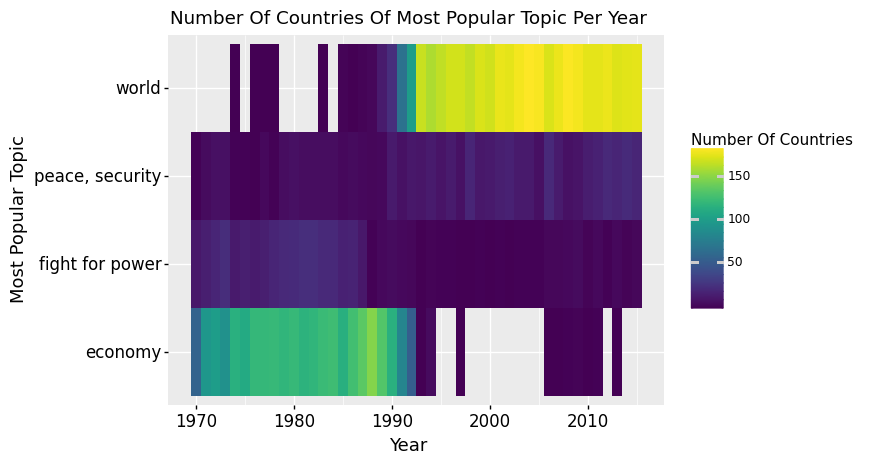

<ggplot: (192360551674)>

In [211]:
p = (
    speech_topics >>
    group_by(X.year, X.top_topic_name) >>
    select(X.country, X.year, X.top_topic_name) >>
    summarize(numberCountries = n(X.country)) >>
    ggplot(aes(x = "year", y = "top_topic_name")) +
    geom_tile(aes(fill = "numberCountries")) +
#     scale_fill_viridis_c(option = "B", direction = -1) 
#     scale_fill_brewer(type = "qual", palette = "Set1") +
    theme(
#         axis_text_x = element_text(angle = 90),
         axis_text = element_text(size = 12, color = "black"),
         axis_title = element_text(size = 13, color = "black")) +
    labs(
        x = "Year",
        y = "Most Popular Topic",
        title = "Number Of Countries Of Most Popular Topic Per Year",
        fill = "Number Of Countries"
    )
)
ggsave(plot = p, filename = "topicsPerYear.png")
p

Between 1970 and 1990, the economy was the most popular topic to talk about in the UN speeches. But starting in around 1995, a huge number of countries actually started talking about the world in a global perspective. There number of countries talking about peace, security, and fight for power remained relatively the same.

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


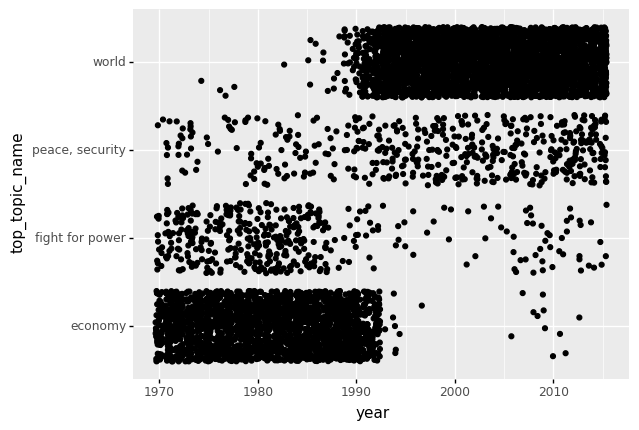

<ggplot: (192366954066)>

In [178]:
# (
#     speech_topics >>
#     group_by(X.country) >>
#     ggplot(aes(x = "year", y = "top_topic_name")) +
#     geom_point(position = "jitter")
# )

plt.figure(figsize=(20, 18))

ax = sns.heatmap(tinyLoadings, 
#             ax = ax,
            cmap = "coolwarm", 
            center = 0,
            annot = True,
#             cbar_kws={"orientation": "horizontal"}, # color legend is horizontal
            yticklabels = ["Gross \nPay", "Net \nPay", "Fair \nGross Pay", "Fair \nNet Pay"],
            xticklabels = ["Workers", "Unfair Work\n Conditions", "Net Vs. \nGross Pay"],
            # color legend title
#             cbar_kws={'label': 'Loading Weight'}
           )

# Axis titles
ax.set(
    title = "My Title",
    ylabel = "Top Topic",
    xlabel = "Year",
)

In [57]:
# summarize = pipeline("summarization")
# summary = summarize(list_of_strings[0:1], max_length = 10, clean_up_tokenization_spaces=True)
# summary

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [58]:
# '''
# for every speech:
#     spawn nlp()
#     tokenize()
#     remove stop words
#     remove punctuation and special characters!
    
# '''
# def toTokenize(text):
#     '''
#     Tokenizes a text
    
#     @param NLP text the given NLP figure
#     @return a list of tokenized words
#     '''
#     text_tokenized = []

#     for t in text:
#         text_tokenized.append(t.text)
#     return text_tokenized

# def removeStopwords(text_tokenized, sw = both_sw):
#     '''
#     Removes stopwords from a given tokenized text list
    
#     @param list text_tokenized the given list of tokenized words
#     @param set sw default is the nltk-spaCy stopwords
#     @return a filtered, tokenized list (without stopwords!)
#     '''
    
#     # Filter out stopwords (using list comprehension)
#     text_filtered = [w for w in text_tokenized if w not in sw]
#     return text_filtered

# def toLemmatize():
#     '''
    
#     '''
#     print("helo")

# maxNumDoc = 3
# # docIndex = 0
# for docIndex in range(len(speeches.text[0:maxNumDoc])):

#     speech = speeches["text"][docIndex].lower()
    
#     # nlp object
#     nlpSpeech = nlp(speech)
    
#     # tokenize speech
#     text_tokenized = toTokenize(nlpSpeech)
    
#     # tokenized, no stopwords
#     text_filtered = removeStopwords(text_tokenized)
    
    
#     vec = CountVectorizer
# #     sentiment_polarity = [textblob.TextBlob(speech.text).sentiment.polarity for speech in doc]
# #     print(len(sentiment_polarity))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [59]:
# # print("hello")
# myLemonizer = WordNetLemmatizer()
# myStemmer = SnowballStemmer(language = "english")
# words = ["viet-nam", "Vietnam", "Viet", "depending", "depends", 
#          "carries", "carry", "carri", "generosity", "generous", "better",
#          "best", "in a meeting", "meeting", "am meeting you", "countries", "country"
#         ]
# for word in words:
#     word = word.lower()
#     print(f"Lemmatize: {myLemonizer.lemmatize(word)}, Stem: {myStemmer.stem(word)}")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [60]:
# sentiment_polarity = [textblob.TextBlob(speech).sentiment.polarity for speech in speeches.text[0:5]]
# predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [61]:
# sentiment_polarity

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Spliting CSV files in Python

https://dzone.com/articles/splitting-csv-files-in-python